# Movie Lines - Sentiment Analysis

## Read Movie Lines Dataset

In [3]:
import pandas as pd

# Define column names
column_names = ['line_id', 'characterID', 'movieID', 'characterName', 'text']

# Read the file with the provided column names
movie_lines = pd.read_csv('data/movie_lines.tsv', sep='\t', encoding='utf-8', header=None, names=column_names, on_bad_lines='skip')

# Print the first few rows to verify
print(movie_lines.head())

  line_id characterID movieID characterName          text
0   L1045          u0      m0        BIANCA  They do not!
1   L1044          u2      m0       CAMERON   They do to!
2    L985          u0      m0        BIANCA    I hope so.
3    L984          u2      m0       CAMERON     She okay?
4    L925          u0      m0        BIANCA     Let's go.


## Group Movie Lines by Movie ID

To test more informative sentiment analysis, group individual lines by movie.

In [7]:
# Fill missing values with an empty string and ensure conversion to string
movie_lines['text'] = movie_lines['text'].fillna('').astype(str)

# Group and concatenate all the text for each movieID
movie_texts = movie_lines.groupby('movieID')['text'].apply(lambda x: ' '.join(x)).reset_index()

# Print the first few rows to verify
print(movie_texts.head())

  movieID                                               text
0      m0  They do not! They do to! I hope so. She okay? ...
1      m1  Can't be that far I say.  Also I don't like th...
2     m10  All the figures show is that Gordon LaRiviere ...
3    m100  Sending what we know back to U.S.T. via satell...
4    m101  In the backyard. Where? I heard them. Did you ...


## Sentiment Analysis Using TextBlob

- -1.0 indicates a very negative sentiment
- 0.0 indicates a neutral sentiment
- 1.0 indicates a very positive sentimentt.

In [9]:
from textblob import TextBlob

# Define a function to get sentiment polarity of a text
def get_sentiment(text):
    try:
        return TextBlob(text).sentiment.polarity
    except Exception as e:
        return None

# Apply the sentiment analysis to the 'text' column
movie_texts['tb_sentiment'] = movie_texts['text'].apply(get_sentiment)

# Display the first few rows with the new sentiment column
print(movie_texts.head())

  movieID                                               text  tb_sentiment
0      m0  They do not! They do to! I hope so. She okay? ...      0.091711
1      m1  Can't be that far I say.  Also I don't like th...      0.054894
2     m10  All the figures show is that Gordon LaRiviere ...      0.028194
3    m100  Sending what we know back to U.S.T. via satell...      0.110318
4    m101  In the backyard. Where? I heard them. Did you ...      0.079791


# Visualize Results

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

Histogram of Sentiment Polarity

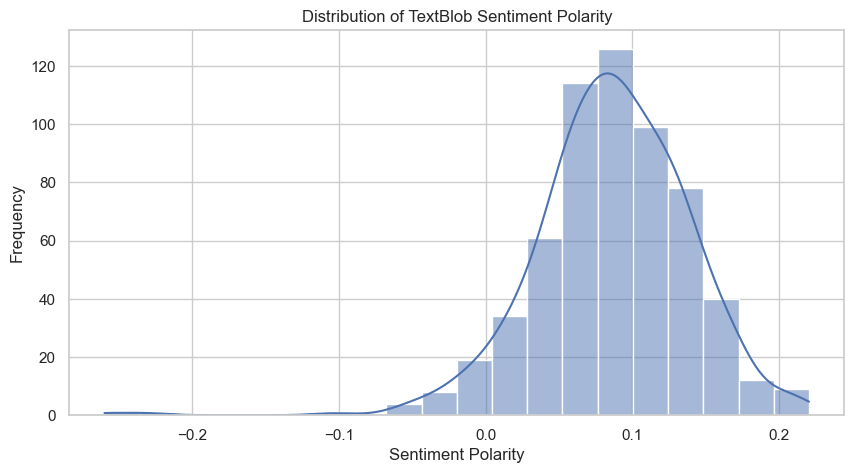

In [13]:

plt.figure(figsize=(10, 5))
sns.histplot(movie_texts['tb_sentiment'], bins=20, kde=True)
plt.title('Distribution of TextBlob Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

Box Plot of Sentiment Polarity

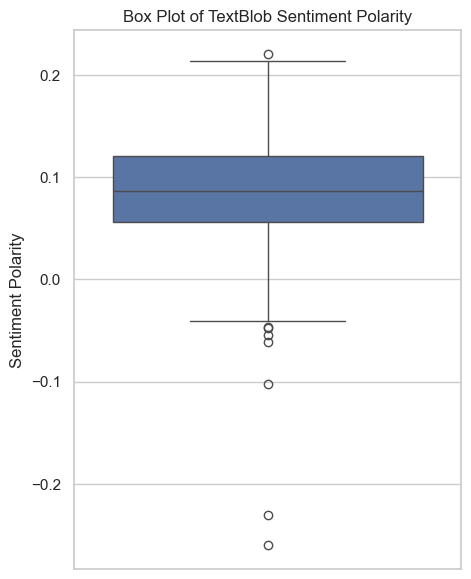

In [15]:
plt.figure(figsize=(5, 7))
sns.boxplot(y=movie_texts['tb_sentiment'])
plt.title('Box Plot of TextBlob Sentiment Polarity')
plt.ylabel('Sentiment Polarity')
plt.show()

Violin plot for the sentiment polarity

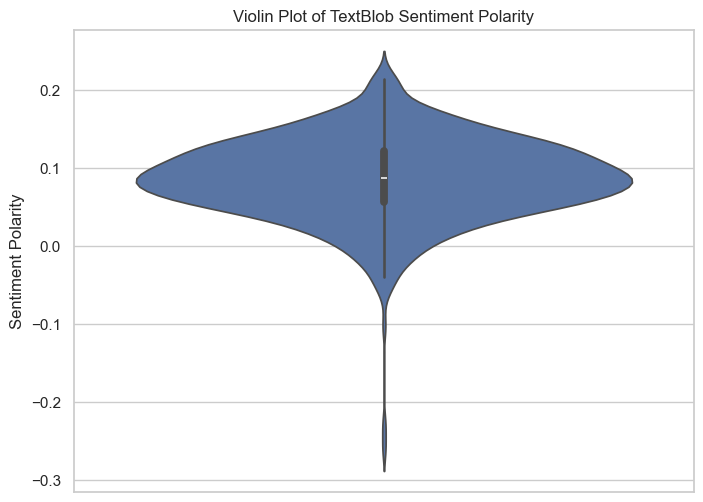

In [17]:
plt.figure(figsize=(8, 6))
sns.violinplot(y=movie_texts['tb_sentiment'])
plt.title('Violin Plot of TextBlob Sentiment Polarity')
plt.ylabel('Sentiment Polarity')
plt.show()

Scatter Plot (Line Index vs. Sentiment Polarity)

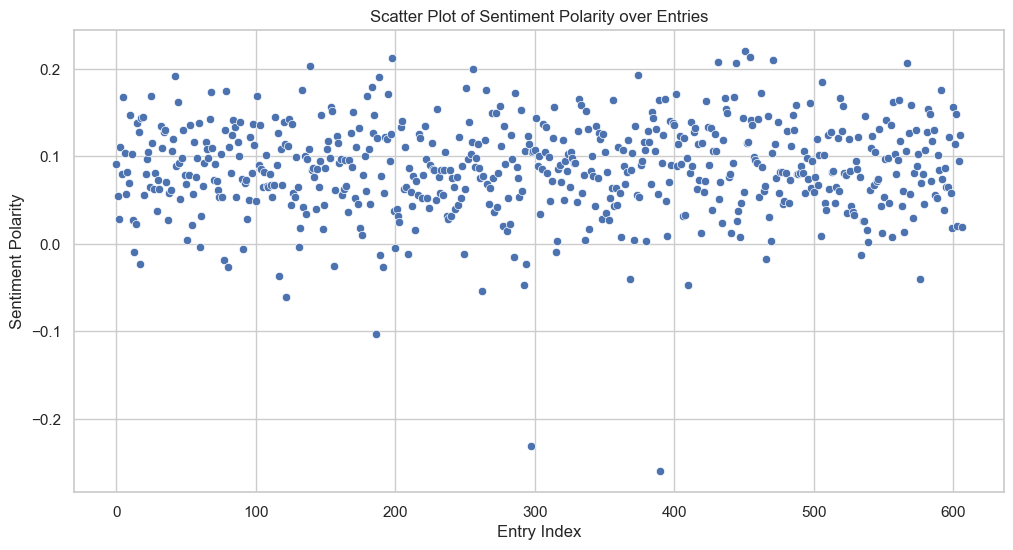

In [19]:
plt.figure(figsize=(12, 6))
movie_texts = movie_texts.reset_index()  # ensure a sequential index is available
sns.scatterplot(x='index', y='tb_sentiment', data=movie_texts)
plt.title('Scatter Plot of Sentiment Polarity over Entries')
plt.xlabel('Entry Index')
plt.ylabel('Sentiment Polarity')
plt.show()

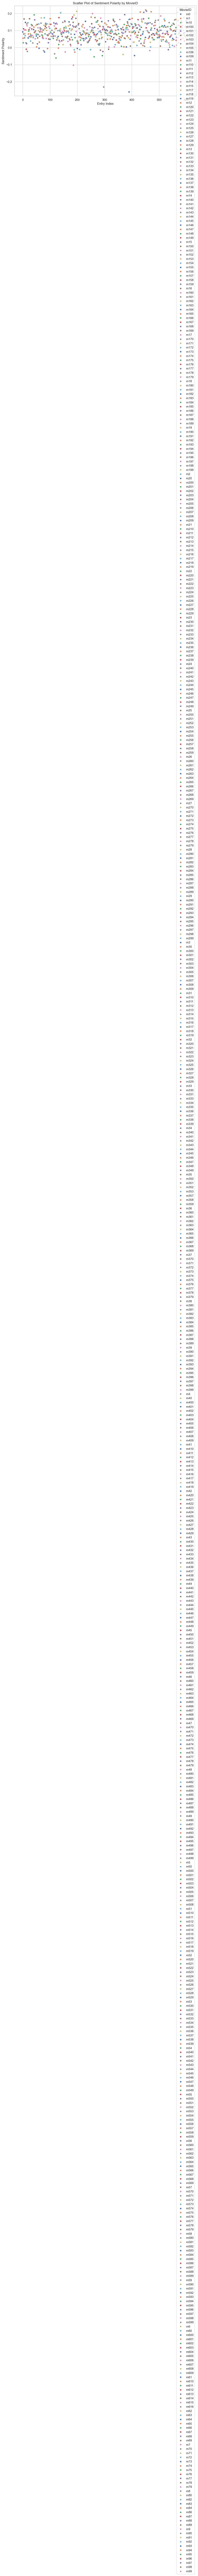

In [21]:
# Ensure a sequential index is used for plotting
movie_texts = movie_texts.reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='index', y='tb_sentiment', hue='movieID', data=movie_texts, palette='deep')
plt.title('Scatter Plot of Sentiment Polarity by MovieID')
plt.xlabel('Entry Index')
plt.ylabel('Sentiment Polarity')
plt.legend(title='MovieID')
plt.show()